# Customer Churn Prediction 

### dataset is taken from Kaggle

In [44]:
# Predicting whether a customer will change telecommunications provider

## Dataset Information

The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:

"state", string. 2-letter code of the US state of customer residence "account_length", numerical. Number of months the customer has been with the current telco provider "area_code", string="area_code_AAA" where AAA = 3 digit area code. "international_plan", (yes/no). The customer has international plan. "voice_mail_plan", (yes/no). The customer has voice mail plan. "number_vmail_messages", numerical. Number of voice-mail messages. "total_day_minutes", numerical. Total minutes of day calls. "total_day_calls", numerical. Total minutes of day calls. "total_day_charge", numerical. Total charge of day calls. "total_eve_minutes", numerical. Total minutes of evening calls. "total_eve_calls", numerical. Total number of evening calls. "total_eve_charge", numerical. Total charge of evening calls. "total_night_minutes", numerical. Total minutes of night calls. "total_night_calls", numerical. Total number of night calls. "total_night_charge", numerical. Total charge of night calls. "total_intl_minutes", numerical. Total minutes of international calls. "total_intl_calls", numerical. Total number of international calls. "total_intl_charge", numerical. Total charge of international calls "number_customer_service_calls", numerical. Number of calls to customer service "churn", (yes/no). Customer churn - target variable.



## importing important library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('dark')

import warnings
warnings.simplefilter("ignore")

# Exploratory Data Analysis

In [2]:
df1 = pd.read_csv("train.csv")

In [3]:
df1.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
df1.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [6]:
df2 = pd.read_csv("test.csv")

In [7]:
df2.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [8]:
df2.describe()

,id,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,375.50000,100.385333,8.454667,180.454933,100.721333,30.677920,203.258267,100.273333,17.277080,199.619467,100.370667,8.982827,10.294133,4.485333,2.779933,1.634667
std,216.65064,39.699029,14.123712,53.258337,19.718539,9.053756,52.185471,19.367535,4.435638,51.531351,19.185238,2.318920,2.770340,2.421901,0.747704,1.276207
min,1.00000,1.000000,0.000000,12.500000,39.000000,2.130000,31.200000,37.000000,2.650000,50.900000,12.000000,2.290000,0.000000,0.000000,0.000000,0.000000
25%,188.25000,74.000000,0.000000,146.625000,88.000000,24.925000,166.800000,87.000000,14.177500,164.475000,88.000000,7.402500,8.525000,3.000000,2.305000,1.000000
50%,375.50000,101.000000,0.000000,178.200000,101.000000,30.295000,203.350000,101.000000,17.285000,199.450000,100.500000,8.975000,10.300000,4.000000,2.780000,1.000000
75%,562.75000,126.000000,21.000000,215.975000,114.000000,36.715000,235.975000,113.000000,20.057500,234.800000,113.000000,10.565000,12.100000,6.000000,3.270000,2.000000
max,750.00000,238.000000,51.000000,350.800000,163.000000,59.640000,363.700000,164.000000,30.910000,364.300000,168.000000,16.390000,18.900000,19.000000,5.100000,6.000000


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

### No null value has been detected.

In [10]:
df1.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

## Creating a function that could clean the dataset, further used for test dataset

In [11]:
def compact(df):
    # rectifying area_code column 
    df["area_code"] = df["area_code"].apply(lambda code: code.split("_")[2]).astype(int)
    
    # compacting the data
    df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
    df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
    df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']
    
    # dropping these columns compacted
    df.drop(columns= ['total_day_charge', 'total_eve_charge','total_night_charge',
                      'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                      'total_eve_minutes', 'total_night_minutes',
                      'state'], inplace= True)
    
    # Applying mapping for categorical function
    df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
    df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0}) 
    
    return df

In [12]:
X = compact(df1.drop(columns= ['churn']))
y = pd.Categorical(df1['churn'])

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   area_code                      4250 non-null   int32  
 2   international_plan             4250 non-null   int64  
 3   voice_mail_plan                4250 non-null   int64  
 4   number_vmail_messages          4250 non-null   int64  
 5   total_intl_minutes             4250 non-null   float64
 6   total_intl_calls               4250 non-null   int64  
 7   total_intl_charge              4250 non-null   float64
 8   number_customer_service_calls  4250 non-null   int64  
 9   total_minutes                  4250 non-null   float64
 10  total_calls                    4250 non-null   int64  
 11  total_charge                   4250 non-null   float64
dtypes: float64(4), int32(1), int64(7)
memory usage: 

In [14]:
X.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charge
0,107,415,0,1,26,13.7,3,3.70,1,611.5,329,55.54
1,137,415,0,0,0,12.2,5,3.29,0,527.2,328,59.00
2,84,408,1,0,0,6.6,7,1.78,2,558.2,248,65.02
3,75,415,1,0,0,10.1,3,2.73,3,501.9,356,49.36
4,121,510,0,1,24,7.5,7,2.03,3,779.3,314,76.28


<AxesSubplot:>

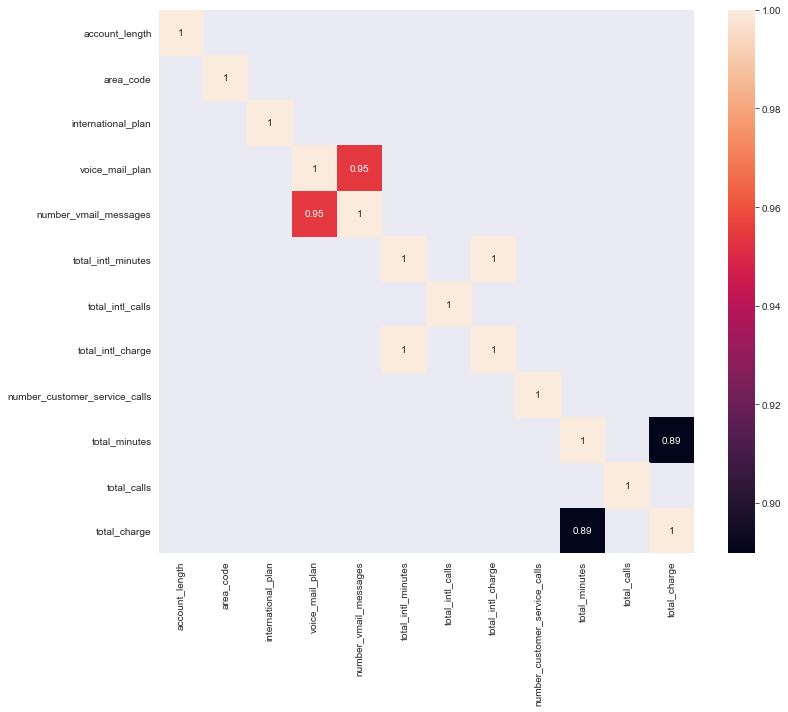

In [15]:
df_corr = X.corr()[X.corr()>=0.75]
df_corr
plt.figure(figsize = (12,10))
sns.heatmap(df_corr,annot=True)

In [16]:
# dropping voice_mail_plan to remove multicollinearity
X.drop(["voice_mail_plan"],inplace = True, axis = 1)

## Splitting the Dataset

In [17]:
from sklearn.model_selection import train_test_split 
x_train, x_val, y_train, y_val = train_test_split(X, y , test_size=0.25, stratify= y, random_state=1) 
y_train.value_counts(), y_val.value_counts()

(no     2739
 yes     448
 dtype: int64,
 no     913
 yes    150
 dtype: int64)

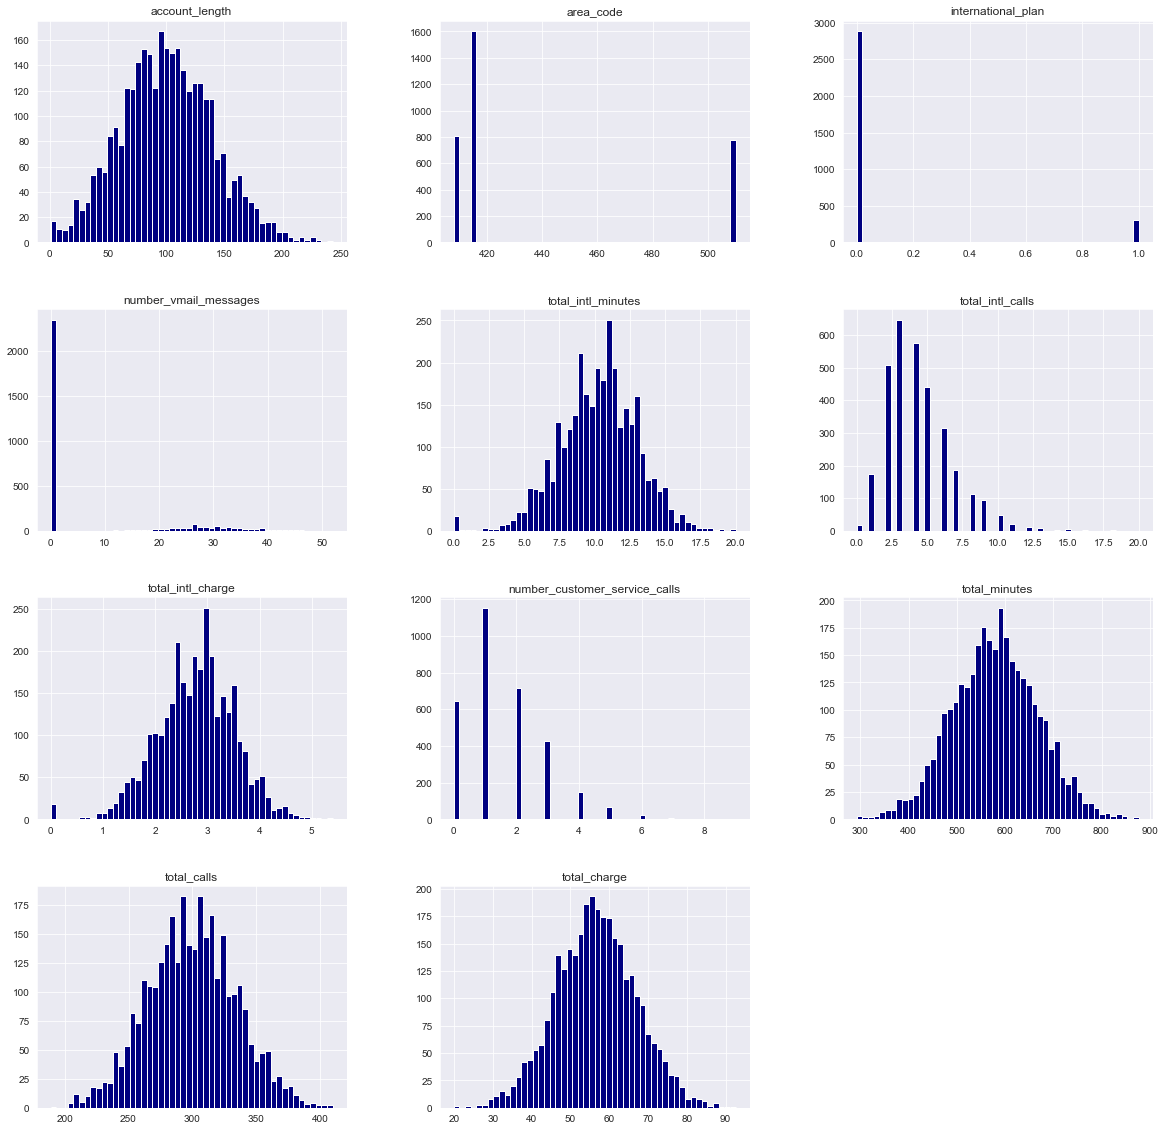

In [18]:

temp = x_train[['account_length', 'area_code', 'international_plan',
       'number_vmail_messages', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'total_minutes',
       'total_calls', 'total_charge' ]]
temp.hist(bins=50,figsize=(20,20),color='navy');

<AxesSubplot:xlabel='number_customer_service_calls', ylabel='count'>

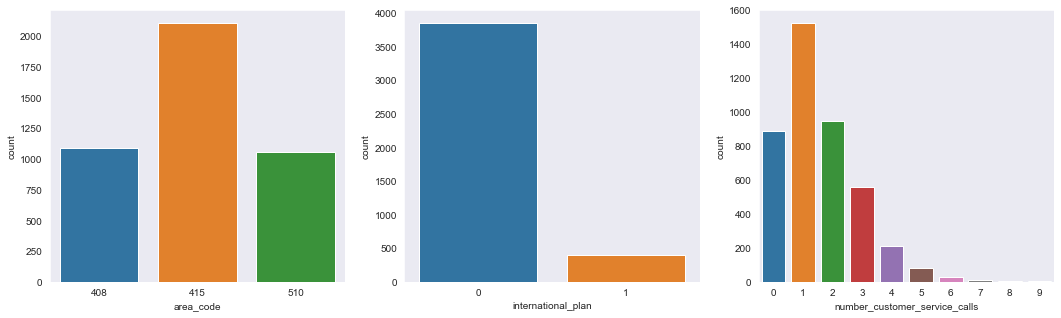

In [19]:
## Visualising ordinal feautres
fig, axes = plt.subplots(1,3, figsize=(18, 5))

sns.countplot(X["area_code"], ax=axes[0])
sns.countplot(X["international_plan"], ax=axes[1])
# sns.countplot(X["voice_mail_plan"], ax=axes[])
sns.countplot(X["number_customer_service_calls"], ax=axes[2])


# sns.countplot(X["area_code"])
# sns.countplot(X["international_plan"])
# sns.countplot(X['voice_mail_plan'])
# sns.countplot(X['number_customer_service_calls'])

# Applying Models

## Training Data

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

clf1  = LogisticRegression(max_iter=300,)
clf1 .fit(x_train,y_train )
print ("Training Accuracy")
clf1 .score(x_train, y_train)

Training Accuracy


0.8697834954502667

In [21]:
pre = clf1 .predict(x_val)
score = [i for i, j in zip(pre, y_val) if i == j]

score = len(score)/len(y_val)
score

0.8617121354656632

### Gradient boosting Classifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

clf2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,max_depth=13)
clf2.fit(x_train,y_train )
clf2.score(x_train, y_train)

0.9993724505804832

In [23]:
pre = clf2.predict(x_val)
score = [i for i, j in zip(pre, y_val) if i == j]

score = len(score)/len(y_val)
score

0.9755409219190969

### Decision Tree

In [24]:
from sklearn import tree
clf3 = tree.DecisionTreeClassifier()
clf3.fit(x_train, y_train)
clf3.score(x_train, y_train)

1.0

In [25]:
pre = clf3.predict(x_val)
score = [i for i, j in zip(pre, y_val) if i == j]

score = len(score)/len(y_val)
score

0.9539040451552211

### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier()
clf4.fit(x_train,y_train)
clf4.score(x_train,y_train)

1.0

In [27]:
pre = clf4.predict(x_val)
score = [i for i, j in zip(pre, y_val) if i == j]

score = len(score)/len(y_val)
score

0.9755409219190969

### KNN Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
clf5 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf5.fit(x_train, y_train)
clf5.score(x_train, y_train)

0.8926890492626295

In [29]:
pre = clf5.predict(x_val)
score = [i for i, j in zip(pre, y_val) if i == j]

score = len(score)/len(y_val)
score

0.8682972718720602

### SVM Classifier

In [30]:
from sklearn import svm
clf6 = svm.SVC()
clf6.fit(x_train, y_train)
clf6.score(x_train, y_train)

0.8594289300282397

In [31]:
pre = clf6.predict(x_val)
score = [i for i, j in zip(pre, y_val) if i == j]

score = len(score)/len(y_val)
score

0.8588899341486359

### Artificial Neural Network (MLP)

In [32]:
from sklearn.neural_network import MLPClassifier
clf7 = MLPClassifier(random_state=1, max_iter=500)
clf7.fit(x_train, y_train)
clf7.score(x_train, y_train)

0.8917477251333542

In [33]:
pre = clf7.predict(x_val)
score = [i for i, j in zip(pre, y_val) if i == j]

score = len(score)/len(y_val)
score

0.883349012229539

## Test data

In [34]:
x_test = df2.drop(columns = 'id')

In [35]:
x_test = compact(x_test)


In [36]:
x_test.drop(["voice_mail_plan"],inplace = True, axis = 1)
x_test.head()

,account_length,area_code,international_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charge
0,128,415,0,25,10.0,3,2.70,1,707.2,300,72.86
1,118,510,1,0,6.3,6,1.70,0,647.9,317,65.91
2,62,415,0,0,13.1,6,3.54,4,630.9,245,55.77
3,93,510,0,0,8.1,3,2.19,3,538.5,346,56.80
4,174,415,0,0,15.5,5,4.19,3,652.1,303,55.96


## Predicting and saving the result with test data

In [37]:
# Logistic Regression
pre1 = clf1.predict(x_test)
ansclf1 = pd.read_csv('sampleSubmission.csv')
ansclf1['churn'] = pre1
ansclf1.to_csv('sampleSubmissionclf1.csv', index=False)
ansclf1.head()

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [38]:
# Gradient boosting Classifier
pre2 = clf2.predict(x_test)
ansclf2 = pd.read_csv('sampleSubmission.csv')
ansclf2['churn'] = pre2 
ansclf2.to_csv('sampleSubmissionclf2.csv', index=False)
ansclf2.head()


,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [39]:
#Decision Tree
pre3 = clf3.predict(x_test)
ansclf3 = pd.read_csv('sampleSubmission.csv')
ansclf3['churn'] = pre3
ansclf3.to_csv('sampleSubmissionclf3.csv', index=False)
ansclf3.head()

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [40]:
# Random Forest Classifier
pre4 = clf4.predict(x_test)
ansclf4 = pd.read_csv('sampleSubmission.csv')
ansclf4['churn'] = pre4
ansclf4.to_csv('sampleSubmissionclf4.csv', index=False)
ansclf4.head()

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [41]:
# KNN Classifier
pre5 = clf5.predict(x_test)
ansclf5 = pd.read_csv('sampleSubmission.csv')
ansclf5['churn'] = pre3
ansclf5.to_csv('sampleSubmissionclf5.csv', index=False)
ansclf5.head()

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [42]:
# SVM Classifier
pre6 = clf6.predict(x_test)
ansclf6 = pd.read_csv('sampleSubmission.csv')
ansclf6['churn'] = pre6
ansclf6.to_csv('sampleSubmissionclf6.csv', index=False)
ansclf6.head()

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [43]:
# Artificial Neural Network (MLP) 
pre7 = clf7.predict(x_test)
ansclf7 = pd.read_csv('sampleSubmission.csv')
ansclf7['churn'] = pre7
ansclf7.to_csv('sampleSubmissionclf7.csv', index=False)
ansclf7.head()

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


# ************************************************* Thank You *****************************************************************